**Table of contents**<a id='toc0_'></a>    
- [Introduction: Networks](#toc1_1_)    
  - [What plots are accessible in the system ?](#toc1_2_)    
  - [Implict plot access: hub.plot, hub.plot_preset, hub.supplements...](#toc1_3_)    
  - [Illustration plot by plot](#toc1_4_)    
    - [Var](#toc1_4_1_)    
    - [Byunits](#toc1_4_2_)    
    - [nyaxis](#toc1_4_3_)    
    - [XY](#toc1_4_4_)    
    - [XYZ](#toc1_4_5_)    
    - [Sankey](#toc1_4_6_)    
    - [Repartition](#toc1_4_7_)    
  - [Write your own plots !](#toc1_5_)    
    - [Recommendation](#toc1_5_1_)    
    - [Insert your plot in the structure](#toc1_5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [3]:
# Basic imports
import numpy as np

# CHIMES IMPORTATION
import sys
sys.path.insert(0, '../../')
import chimes as chm


In [4]:
# IMPROVING THE DISPLAY (OPTIONAL) ##############################
# Better display of tables
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option("display.colheader_justify","left")

# Interactive tables 
from itables import init_notebook_mode,options
options.columnDefs = [{"className": "dt-left", "targets": "_all"}]
options.classes="display nowrap compact"
options.scrollY="400px"
options.scrollCollapse=True
options.paging=False
init_notebook_mode(all_interactive=True)

# traditional display for ipython
from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

# Better display of plots: latex encoding in plotly
%matplotlib widget
import plotly
plotly.offline.init_notebook_mode()
display(HTML('<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'))



<IPython.core.display.Javascript object>

## <a id='toc1_1_'></a>[Introduction: Networks](#toc0_)

Traditional in the dynamical systems, one can vizualise a model with a causal network. The color code is: 
* Blue: parameters
* Red: differential variables
* Yellow: State variables 

When you highlight a field, you will get all his properties aside. Explore a model with that !

Network are generated in html, you can find the files in `docs/Networks` as `MODELNAME.html`. It should automatically open in your browser

In [ ]:
hub=chm.Hub('Goodwin_example',verb=False)
help(hub.get_Network)
hub.get_Network() # Will display the network with all fields that are not auxilliary
# hub.get_Network(auxilliary=True) # Will in this example add the auxilliary fields, here `g` the growth rate
# hub.get_Network(filters=('p')) # Remove the price
# hub.get_Network(params=False) # Will remove the parameters

## <a id='toc1_2_'></a>[What plots are accessible in the system ?](#toc0_)

CHIMES comes with an ensemble of plots that you can use directly through the hub, with minimal manipulation. You can get the figure as an object to later improve it, or simply display it. 
Some plots are linked or will adapt to special types of runs (uncertainty, cycles analysis...), often automatically doing the additional analysis when required. 


In [ ]:
chm.get_available_plots()


![FiguresChimes.png](FiguresChimes.png)


## <a id='toc1_3_'></a>[Implict plot access: hub.plot, hub.plot_preset, hub.supplements...](#toc0_)

* You can access to the time evolution of all variables simply through `hub.plot()`, which is calling `chm.Plots.byunits()`, a first good approach to your results. You can customize the plots with the same methods as the original plot
* When the modeler has created presets, he might have defined some plot preset with each in the model file. to access this, you can use: `hub.plot_preset('preset_name')`, or if your hub has loaded a preset, `hub.plot_preset()` directly. The presets can access every plots, and multiple plots of the same types. 
* Some models are fit for very specific plots (multregional, multisectoral...), in that case, some plots are directly put into the supplements of the model. typically check `hub.get_supplements()` to see if some are available.

time step 1000 / 1000


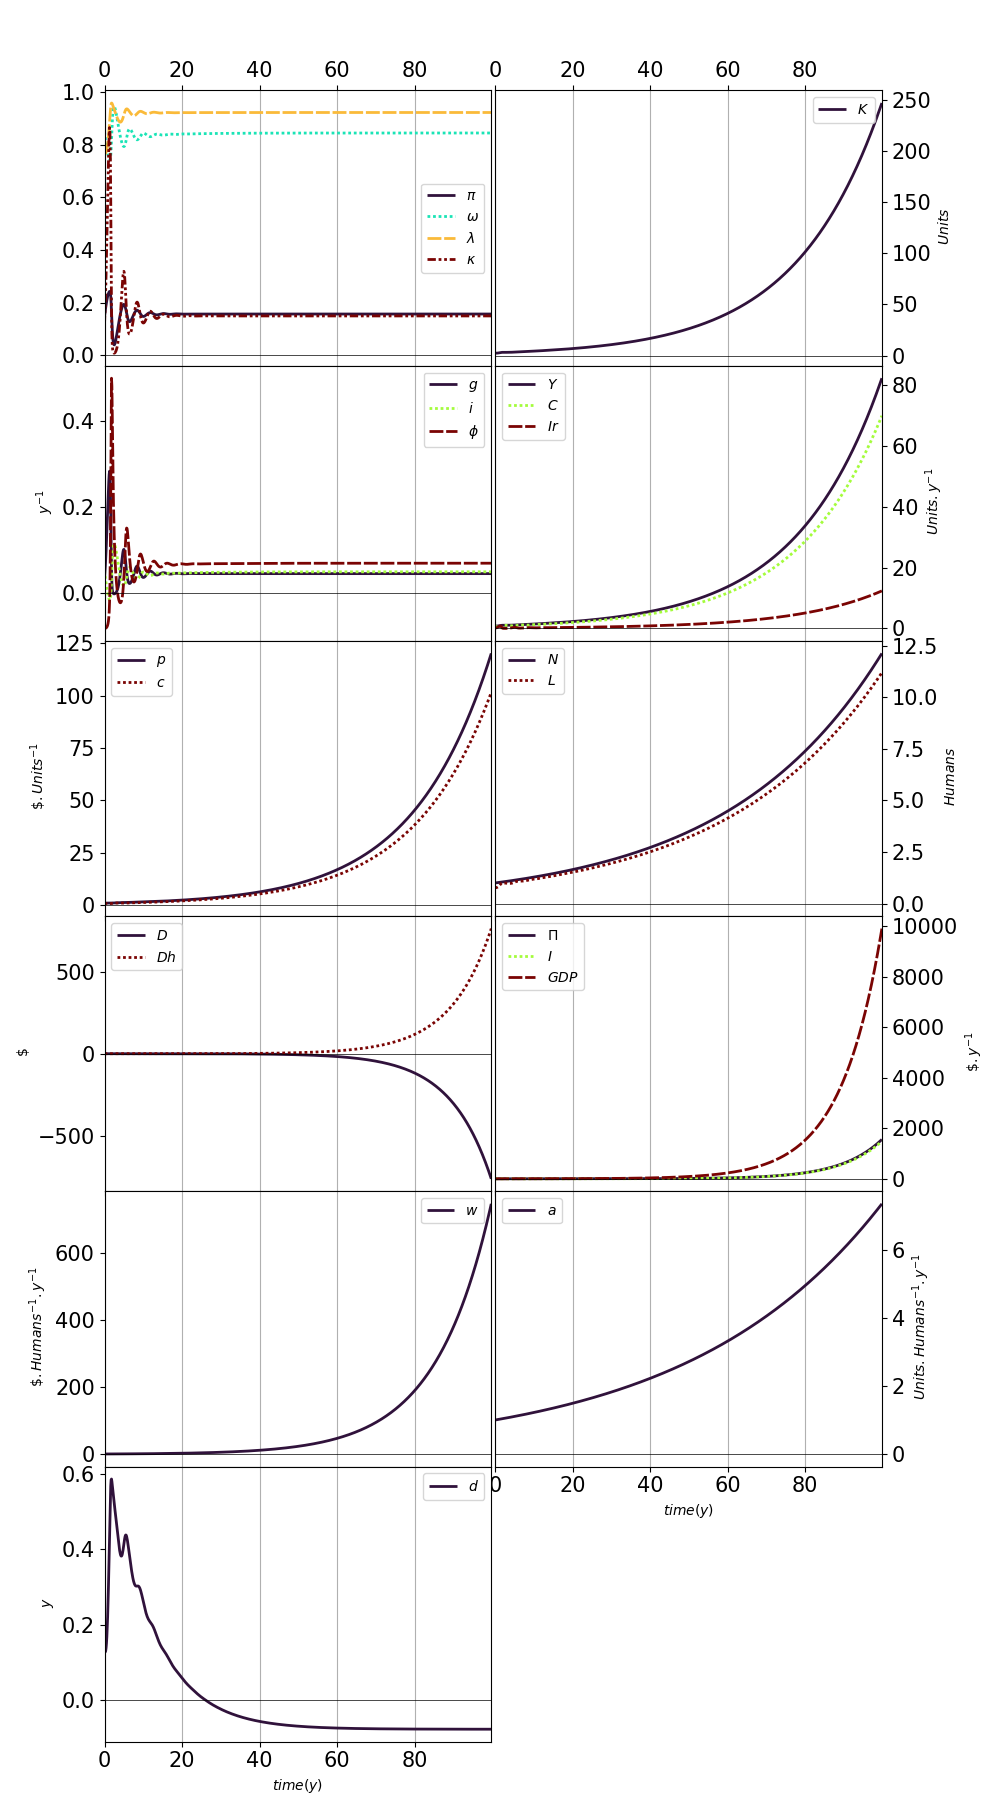

Plot from presets


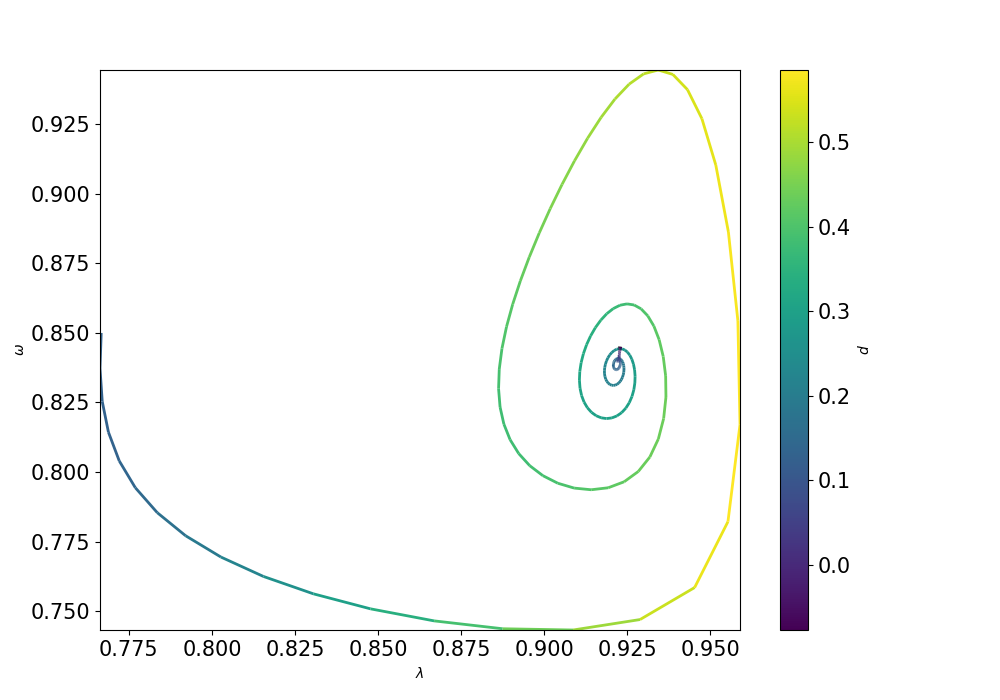

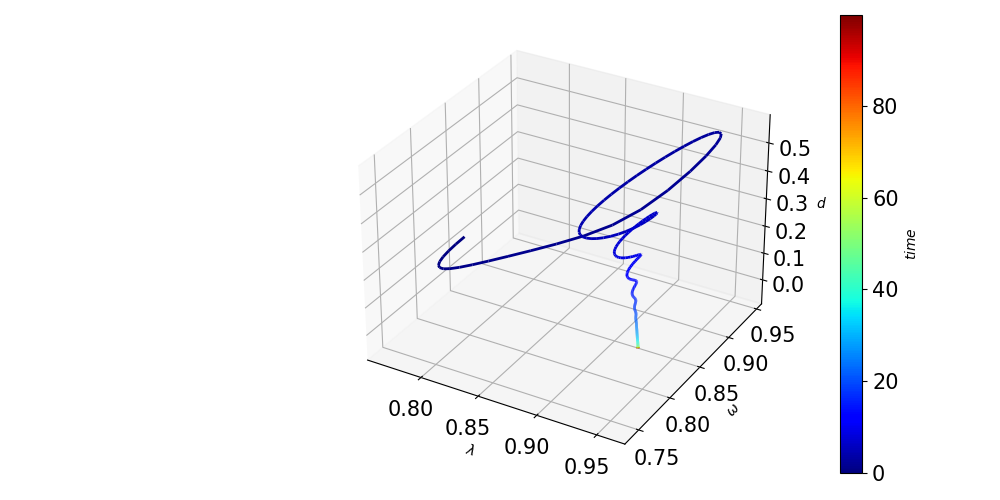

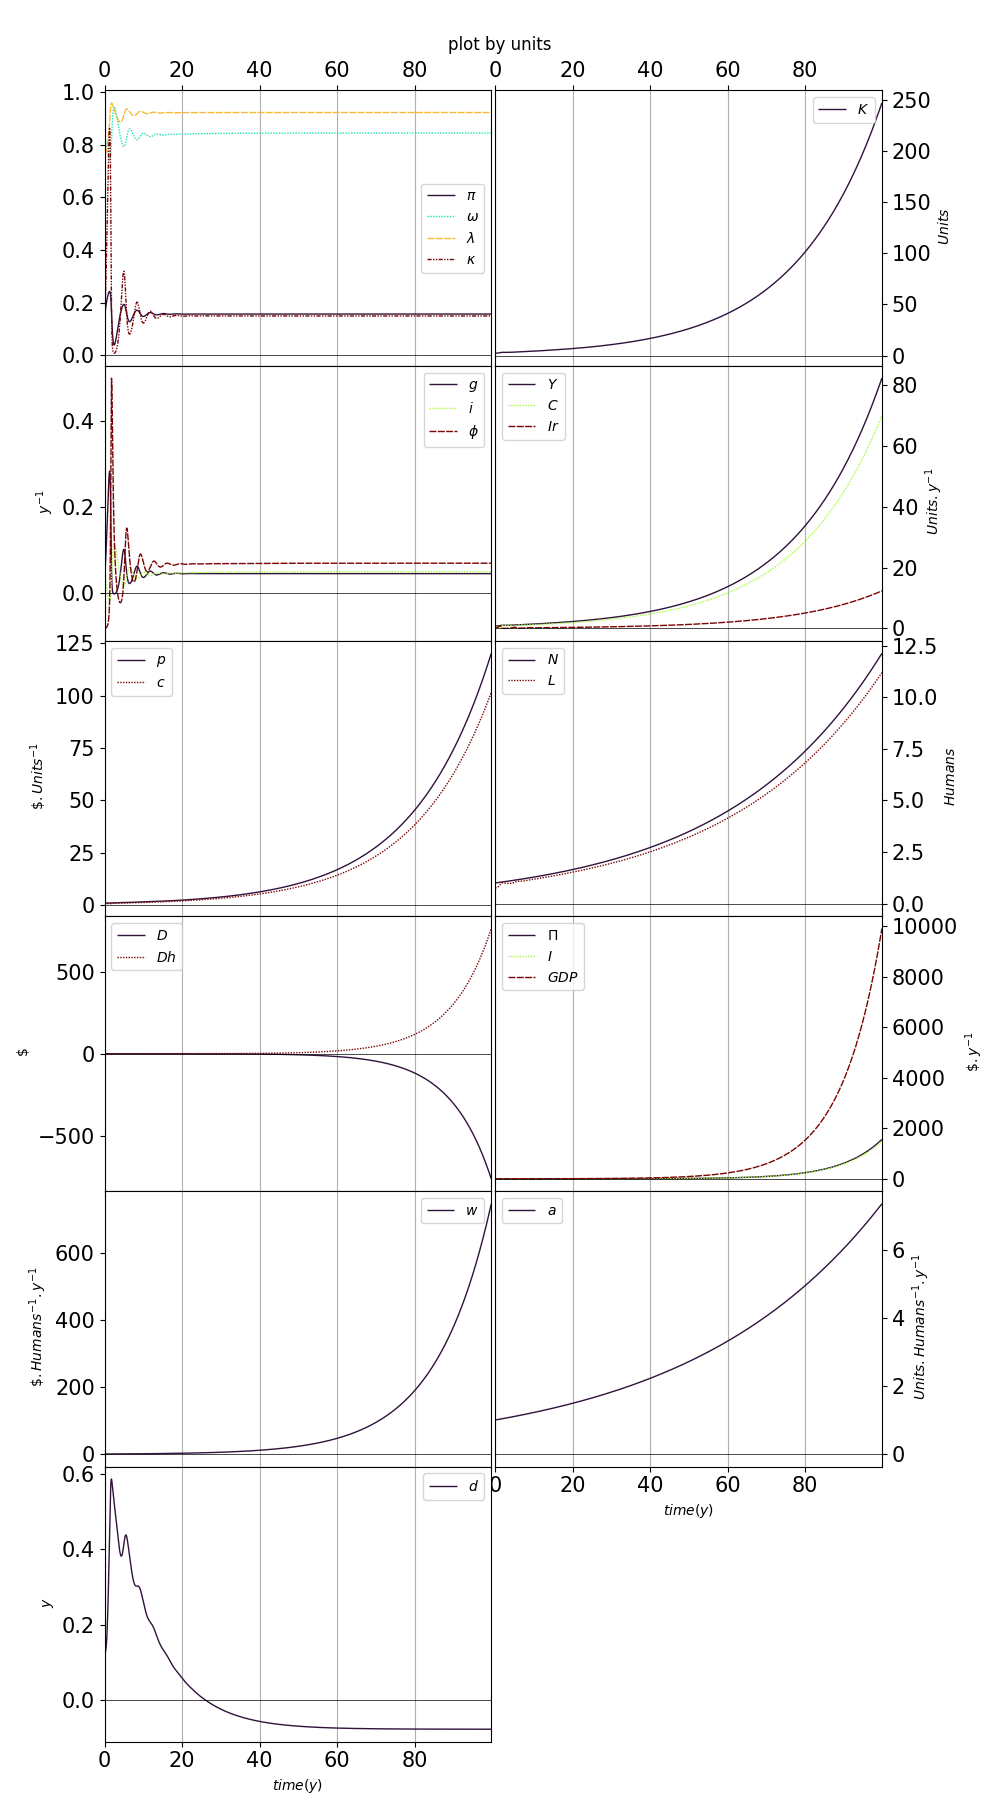

Model       : GK
Goodwin-Keen model: savings-investment dynamics with 
File        : c:\Users\Paul Valcke\Documents\GitHub\CHIMES\tests\..\models\Core\_model_GK.py
#################### Fields ####################
statevar        016 ['Y', 'L', 'GDP', 'd', 'omega', 'employment', 'c', 'Pi', 'inflation', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g', 'C']
differential    008 ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'time']
parameters      015 ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull', 'phi0', 'phi1', 'Delta', 'Nprod']
#################### Presets ####################
          default       : Convergence to equilibrium
         debtcrisis     : Path toward infinite relative debt
     debtstabilisation  : Stabilization through excess of debt
#################### Flags ####################
run            : [999, 99.8999999999986]
cycles         : False
sensitivity    : False
derivative     : False
convergence    : False
multisectoral  : False
multiregional  : False

In [6]:
hub=chm.Hub('GK',verb=False)
hub.run()
hub.plot()

print('Plot from presets')
hub.plot_preset('default')

## <a id='toc1_4_'></a>[Illustration plot by plot](#toc0_)

The following logics always occurs when you call for a plot: 
* You need to put the hub as an argument
* Variable are called by their name, that you typically get from `get_summary()`, `get_fields` or `get_dvalues`
* If you have parrallel run of multiple region, you can add the name or number of the system to plot it (by default, 0) with `index` and `region`
* `tini` is the start of the plot (iteration number if an int, time corresponding if a float such as `40.`)
* `tend` follows the same logics for the end
* `title` is always a string on top of the figure
* Latex rendering is possible
* returnFig let you return the figure as an object (True) or display it (False)

### <a id='toc1_4_1_'></a>[Var](#toc0_)

If you just want to display the time evolution of one variable, or focus on its properties, you can simply use `Var`. It will display one variable. However, if you have done multiple runs in parrallel, you can activate `mode=sensitivity` in the case, the system will calculate the mean value of each time iteration between runs, as well as the standard deviation. You can also set the y axis in log using `log=True` 

In [ ]:
chm.get_plot_documentation('Var')

In [ ]:
hub=chm.Hub('GK',verb=False)
hub.run_uncertainty(3) # Will run in parrallel 10 simulations with slightly different values (5% variation) 
chm.Plots.Var(hub,
              key= 'omega',
              title= 'Just one variable (wage share $\omega$)'
)

chm.Plots.Var(hub,
              key= 'omega',
              idx = 1,
              title='Same variable, different run with 5% variation'
              
)
chm.Plots.Var(hub,
              key= 'omega',
              mode= 'sensitivity',
              tend=25.,
              title='Sensitivity analysis on the 10 parrallel runs with 5% variation'
              
)

chm.Plots.Var(hub,
              key= 'K',
              mode= 'sensitivity',
              log=True,
              tend=25.,
              title=r'On capital with log axis, typical slope : $ \alpha + \beta $.'
              
)


### <a id='toc1_4_2_'></a>[Byunits](#toc0_)

Byunits is the default plot, that is showing everything happening in the system. 
The plot will classify variables by units, then display each categories on a same graph.
You can filters your units, keys, sectors (if multisectoral, see advanced sections), or separate some variables. 

If you prefer plotly design, you can replace `byunits` by `byunits-plotly`

In [ ]:
chm.get_plot_documentation('byunits')

In [ ]:
chm.Plots.byunits(hub)

In [ ]:

chm.Plots.byunits(hub,filters_units=('','y'),title='Everything but dimensionless and times') ### Everything but the dimensionless units
chm.Plots.byunits(hub,filters_units=['','y^{-1}','Units'],separate_variables={'':['employment']})
chm.Plots.byunits(hub,filters_units=['',],title='Only dimensionless') ### Only the dimensionless units

### <a id='toc1_4_3_'></a>[nyaxis](#toc0_)

nyaxis allow you to put on a same graph multiple variables that are not of the same dimension, or not of the same scale. 
It also integrate statistical anlysis of parrallel runs if required. 
The main input is here 'y', a list of list containing all the variables you want to display: `[ [list of variables on first axis], [list of variables on second axis],...]`

In [ ]:
chm.get_plot_documentation('nyaxis')

In [ ]:
hub=chm.Hub('GK',verb=False)
hub.run()
chm.Plots.nyaxis(hub,y=[['employment','omega'],['pi','kappa'],['d'],['g']],
                 tend=20.,
                 title='4 y axis for a Goodwin-Keen model')

hub2=chm.Hub('GK',verb=False)
hub2.run_uncertainty(2)
chm.Plots.nyaxis(hub2,y=[['employment','omega'],['pi','kappa'],['d']],
                 tend=20.,title=r'Now with 2% uncertainty')

hub2=chm.Hub('GK',verb=False)
hub2.run_uncertainty(2)
chm.Plots.nyaxis(hub2,y=[['employment','omega'],['Y']],
                 log=[False,True,True],
                 title=r'Now with on axis in log scale')

### <a id='toc1_4_4_'></a>[XY](#toc0_)

When you are not interested by the time evolution, but phase-space evolution/dependency, XY and XYZ are the prefered tools. Typically, use those for dimensionless quantities, or when a system has no overall growth. 
Simply put in x the variable for the x axis (same for y), and your can add a third for the color. 

In [ ]:
chm.get_plot_documentation('XY')

In [ ]:
chm.Plots.XY(hub,x='employment',y='omega',color='d',tini=5.,title='Simple XY plot with debt ratio as color')
chm.Plots.XY(hub,x='employment',y='omega',tini=5.,tend=20.,title='Simple XY plot with time as color')

### <a id='toc1_4_5_'></a>[XYZ](#toc0_)

XYZ is the 3D equivalent of XY, but with a third dimension. Same approach !

In [ ]:
chm.get_plot_documentation('XYZ')

In [ ]:
chm.Plots.XYZ(hub,x='employment',y='omega',z='d',tini=0.,tend=20.,title='Simple XYZ plot with time as color')
chm.Plots.XYZ(hub,x='employment',y='omega',z='d',color='g',tini=0.,tend=20.,title='Simple XYZ plot growth as color')

### <a id='toc1_4_6_'></a>[Sankey](#toc0_)

Sankey diagrams are a data visualisation technique or flow diagram that emphasizes flow/movement/change from one state to another or one time to another. When you have circuits of goods or money, it's particularly efficient at vizualising the different flows and loops, as well as their evolution. This figure typically requires more preparation, to explicit nodes and the flows between them. It is not constructed on the hub as an imput. 

- nodes (dict): Dictionary {node name: node number} that connects flows.
- Links0 (list): List of lists, each inner list constructed as ['label', 'values over time', source_index, target_index, color_index].

In [ ]:
chm.get_plot_documentation('Sankey')

In [3]:
# Simple illustration on a climate model
hub=chm.Hub('Climate_3Layers',verb=False)
hub.set_fields(dt=1)
hub.run()

R = hub.dvalues(params=True)
title = 'Carbon exchanges in a 3-Layer climate model'
Units = ""
Scale = ((1. / 3.666) * R['Emission'])
Scale /= Scale[0]
nodes = {k: i for i, k in enumerate([
    'Atmosphere',
    'Upper Ocean',
    'Lower Ocean',
    'Society',])}

Links0 = [
    ['Emissions',        (1. / 3.666) * R['Emission'], nodes['Society'], nodes['Atmosphere'], 11],
    ['Atmosphere to Ocean', R['phi12']*R['CO2AT']-R['CO2UP']*(R['phi12']*R['CAT']/R['CUP']), nodes['Atmosphere'], nodes['Upper Ocean'], 7],
    ['Ocean stockage',  R['CO2UP']*R['phi23']+R['phi23']*R['CUP']/R['CLO']*R['CO2LO'], nodes['Upper Ocean'], nodes['Lower Ocean'], 2],
]

chm.Plots.Sankey(**{'title': title, 'Units': Units,  'nodes': nodes, 'Links0': Links0, 'time': R['time']})


time step 100 / 100
0 0
0 0


In [4]:
# Complex illustration on a multisectoral model
hub = chm.load_saved('3SectorsRandom') # We load a save that already had a simulation done

# We prepare the plot. using 
R = hub.get_dfields()
Matrices = ['MtransactI', 'MtransactY']
Vectors = [['pC', 'Consumption', 'Household', True],
           ['wL', 'Wages', 'Household', False],
           ['rD', 'Interests', 'Banks', False]]
Scalars = [['rDh', 'Household', 'Banks', 'Interests', False]]
Nodes,Links = hub.supplements['Generate_LinksNodes_CHIMES'](hub,Matrices,Vectors,Scalars,coloroffset=0)

# Plot generation
F= chm.Plots.Sankey(
title='Monetary flow for E-CHIMES',
        nodes=Nodes,
        Links0=Links,
        Units = '$', 
        time=R['time']['value'][:-1, 0, 0, 0, 0])

loading: c:\Users\Paul Valcke\Documents\GitHub\CHIMES\saves\3SectorsRandom.chm
file Loaded!
Description: 3 Sectors with random matrices out of equilibrium


### <a id='toc1_4_7_'></a>[Repartition](#toc0_)

Repartition is practical to see how the components ponderation of a same quantity evolves with time. 
On a complex model with multiple sectors, coupling matrices, it is practical to see which components are the most important and moving. The method to use it is : 

* keys : List of fields considered in the decomposition.
* sign : Either '+', '-', or a list of ['+', '-'], to apply for each key. Must be a list of the same length as keys.
* ref : The reference level to compare to the components. Typically in the case of debt stock-flow, ref is dotD.

This example is an advanced with a multisectoral economy

In [ ]:
chm.get_plot_documentation('repartition')

In [5]:
hub=chm.load_saved('EChimes2sectors')

for sector in hub.dfields['Nprod']['list']:
    hub._DPLOT.repartition(hub,
                            ['pi', 'omega', 'Mxi', 'Mgamma', 'rd', 'reloverinvest', 'reldotv'],
                            sign=[1, 1, 1, 1, 1, 1, -1],
                            sector=sector,
                            tend=50.,
                            title=f'Expected relative budget $\pi$ for sector {sector}')
    

for sector in hub.dfields['Nprod']['list']:
    hub._DPLOT.repartition(hub,
                            ['MtransactY', 'MtransactI', 'wL', 'pC', 'rD'],
                            sign=[1, 1, 1, -1, 1],
                            ref='dotD',
                            tend=20.,
                            title=f'Monetary Fluxes for sector {sector}',
                            removetranspose=True,)

loading: c:\Users\Paul Valcke\Documents\GitHub\CHIMES\saves\EChimes2sectors.chm


AttributeError: Can't get attribute 'setM.dfields' on <module 'chimes._core_functions._set_methods' from 'c:\\Users\\Paul Valcke\\Documents\\GitHub\\CHIMES\\docs\\Tutorials\\../..\\chimes\\_core_functions\\_set_methods.py'>

## <a id='toc1_5_'></a>[Write your own plots !](#toc0_)

### <a id='toc1_5_1_'></a>[Recommendation](#toc0_)
* Use inputs and data sanitization close to existing plots (hub, variables, filters, title, index, regions, tini, tend,returnFig)...
* Use methods in `plot_tools` that can simplify your plots 
* Typically, `nyaxis` and `byunits` are good inspirations

### <a id='toc1_5_2_'></a>[Insert your plot in the structure](#toc0_)
You can easily add you own plot functions. To do so: 
* Put it in a python file and move the file in `chimes/plots`
* in `__init__.py`, import the function and put it in the `AllPlots` list (this step will soon be automatic)
* you can now call it with `chm.Plots.Name` or use it in preset plot dictionnary as `'name':[{kwargs of the plot 1}, {kwargs of the plot 2},...]`

